# Evaluación M3

## Exploración de datos

In [214]:
# Librerías
#%pip install matplotlib seaborn --quiet
#%pip install scikit-learn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Para imputación de nulos
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer # Necesario para IterativeImputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import KNNImputer 


In [215]:
# configuración
pd.set_option('display.max_columns', None)


In [216]:
# Cargar datos
#  Customer Flight Activity.csv
df_flight = pd.read_csv('resources/Customer_Flight_Activity.csv')
#df_flight = pd.read_csv('resources/Customer_Flight_Activity.csv', index_col=0)


In [217]:
# Visualizar las primeras filas del dataframe
df_flight.head(2)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [218]:
# Visualizar las últimas filas del dataframe
df_flight.tail(2)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


In [219]:
# Visualizar filas aleatorias del dataframe
df_flight.sample(5)

                   


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
19347,231641,2017,2,0,0,0,0,0.0,0,0
76563,576947,2017,5,0,0,0,0,0.0,0,0
168485,970746,2017,10,12,2,14,1708,170.0,0,0
376831,368675,2018,11,0,0,0,0,0.0,0,0
313424,590025,2018,7,15,4,19,4294,429.0,0,0


In [220]:
# Visualizar información general del dataframe
df_flight.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [221]:
# Dimensiones del dataframe
print(f"El dataset tiene {df_flight.shape[0]} filas y {df_flight.shape[1]} columnas")


El dataset tiene 405624 filas y 10 columnas


In [222]:
# Nombres de las columnas
print(f"Nombre de las columnas: {df_flight.columns.tolist()}")


Nombre de las columnas: ['Loyalty Number', 'Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed']


In [223]:
# Duplicados
print(f"El dataset tiene {df_flight.duplicated().sum()} filas duplicadas")


El dataset tiene 1864 filas duplicadas


In [224]:
# Eliminar duplicados
df_flight = df_flight.drop_duplicates() # o df_flight.drop_duplicates(inplace=True)
print(f"El dataset tiene {df_flight.duplicated().sum()} filas duplicadas tras eliminar duplicados")
print(f"Ahora el dataset tiene {df_flight.shape[0]} filas y {df_flight.shape[1]} columnas")

El dataset tiene 0 filas duplicadas tras eliminar duplicados
Ahora el dataset tiene 403760 filas y 10 columnas


In [225]:
# Valores nulos por columna
print(f"El dataset tiene {df_flight.isnull().sum()} valores nulos por columna")


El dataset tiene Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64 valores nulos por columna


In [226]:
# Valores nulos totales
print(f"El dataset tiene {df_flight.isnull().sum().sum()} valores nulos")


El dataset tiene 0 valores nulos


In [227]:
# Valores únicos por columna
print(f"El dataset tiene {df_flight.nunique()} valores únicos por columna")



El dataset tiene Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64 valores únicos por columna


In [228]:
# Tipos de datos por columna
print(f"El dataset tiene {df_flight.dtypes} tipos de datos por columna")



El dataset tiene Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object tipos de datos por columna


In [229]:
# Descripción estadística del dataframe
df_flight.describe(include='all').T


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.0,326699.0,550598.0,772152.0,999986.0
Year,403760.0,2017.500352,0.500000,2017.0,2017.0,2018.0,2018.0,2018.0
Month,403760.0,6.501335,3.451982,1.0,4.0,7.0,10.0,12.0
Flights Booked,403760.0,4.134050,5.230064,0.0,0.0,1.0,8.0,21.0
Flights with Companions,403760.0,1.036569,2.080472,0.0,0.0,0.0,1.0,11.0
Total Flights,403760.0,5.170619,6.526858,0.0,0.0,1.0,10.0,32.0
Distance,403760.0,1214.460979,1434.098521,0.0,0.0,525.0,2342.0,6293.0
Points Accumulated,403760.0,124.263761,146.696179,0.0,0.0,53.0,240.0,676.5
Points Redeemed,403760.0,30.838587,125.758002,0.0,0.0,0.0,0.0,876.0
Dollar Cost Points Redeemed,403760.0,2.495973,10.172033,0.0,0.0,0.0,0.0,71.0


In [230]:
# Carga de datos customer loyalty
df_loyalty = pd.read_csv('resources/Customer_Loyalty_History.csv')
df_loyalty.head(2)



,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


In [231]:
# Visualizar las últimas filas del dataframe
df_loyalty.tail(2)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [232]:
# Visualizar filas aleatorias del dataframe
df_loyalty.sample(5)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
11306,298865,Canada,Alberta,Edmonton,T9G 1W3,Female,Doctor,160909.0,Married,Star,2612.76,Standard,2014,4,NaN,NaN
8403,809587,Canada,British Columbia,Whistler,V6T 1Y8,Female,Bachelor,103425.0,Married,Nova,8954.84,Standard,2012,5,NaN,NaN
3473,256003,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Aurora,13494.76,Standard,2012,9,NaN,NaN
10158,799967,Canada,New Brunswick,Fredericton,E3B 2H2,Male,Doctor,193346.0,Married,Star,2336.29,Standard,2016,9,NaN,NaN
6950,241436,Canada,Ontario,Toronto,M2M 7K8,Male,Bachelor,97030.0,Divorced,Nova,5757.44,Standard,2015,4,NaN,NaN


In [233]:
# Visualizar información general del dataframe
df_loyalty.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [234]:
# Dimensiones del dataframe
print(f"El dataset tiene {df_loyalty.shape[0]} filas y {df_loyalty.shape[1]} columnas")


El dataset tiene 16737 filas y 16 columnas


In [235]:
# Nombres de las columnas
print(f"Nombre de las columnas: {df_loyalty.columns.tolist()}")


Nombre de las columnas: ['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']


In [236]:
# Duplicados
print(f"El dataset tiene {df_loyalty.duplicated().sum()} filas duplicadas")


El dataset tiene 0 filas duplicadas


In [237]:
# Valores nulos por columna
print(f"El dataset tiene {df_loyalty.isnull().sum()} valores nulos por columna")


El dataset tiene Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64 valores nulos por columna


In [238]:
# Valores nulos totales
print(f"El dataset tiene {df_loyalty.isnull().sum().sum()} valores nulos")



El dataset tiene 33578 valores nulos


In [239]:
# Valores únicos por columna
print(f"El dataset tiene {df_loyalty.nunique()} valores únicos por columna")



El dataset tiene Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64 valores únicos por columna


In [240]:
# Tipos de datos por columna
print(f"El dataset tiene {df_loyalty.dtypes} tipos de datos por columna")



El dataset tiene Loyalty Number          int64
Country                object
Province               object
City                   object
Postal Code            object
Gender                 object
Education              object
Salary                float64
Marital Status         object
Loyalty Card           object
CLV                   float64
Enrollment Type        object
Enrollment Year         int64
Enrollment Month        int64
Cancellation Year     float64
Cancellation Month    float64
dtype: object tipos de datos por columna


In [241]:
# Descripción estadística del dataframe - Numéricas
df_loyalty.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [242]:
# Descripción estadística del dataframe - Categóricas
df_loyalty.describe(include = 'object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


### Union de bases


In [243]:
# Se realiza la union de las dos bases de datos por la columna Loyalty Number
df = pd.merge(df_flight, df_loyalty, on='Loyalty Number', how='inner')
df.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN


In [244]:
df.shape

(403760, 25)

In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Year                         403760 non-null  int64  
 2   Month                        403760 non-null  int64  
 3   Flights Booked               403760 non-null  int64  
 4   Flights with Companions      403760 non-null  int64  
 5   Total Flights                403760 non-null  int64  
 6   Distance                     403760 non-null  int64  
 7   Points Accumulated           403760 non-null  float64
 8   Points Redeemed              403760 non-null  int64  
 9   Dollar Cost Points Redeemed  403760 non-null  int64  
 10  Country                      403760 non-null  object 
 11  Province                     403760 non-null  object 
 12  City                         403760 non-null  object 
 13 

In [246]:
df.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
dtype: int64

In [247]:
# Valores nulos por columna en porcentaje redondeado a 2 decimales
porc_nulos =round(df.isnull().sum() / df.shape[0] * 100, 2)
df_nulos = pd.DataFrame(porc_nulos, columns=['%_nulos'])
df_nulos = df_nulos.sort_values(by='%_nulos', ascending=False)
df_nulos

,%_nulos
Cancellation Month,87.70
Cancellation Year,87.70
Salary,25.33
Year,0.00
Flights with Companions,0.00
Total Flights,0.00
Month,0.00
Flights Booked,0.00
Loyalty Number,0.00
Points Redeemed,0.00


In [248]:
# Filtramos para mostrar solo las columnas con nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Cancellation Month,87.70
Cancellation Year,87.70
Salary,25.33


In [249]:
# 1 nombre columnas poner en minúsculas y con guiones bajos
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'cancellation_year',
       'cancellation_month'],
      dtype='object')

In [250]:
# 2 Valores nulos
# A ) para las columnas que tienen casi 90% de valores nulos, se decide eliminarlas
cols_to_drop = ['cancellation_year', 'cancellation_month', ]
df = df.drop(columns=cols_to_drop)

In [251]:
df.head(2)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3


In [252]:
# B) para la otra columna con valores nulos, salary, se decide imputar
#vuelvo a ver los estadísticos de la columna salary
df['salary'].describe()



count    301500.000000
mean      79258.576285
std       34983.929798
min      -58486.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

In [253]:
# El minimo es negativo, lo que no tiene sentido en este contexto
# Voy a ver cuántos valores negativos hay
df_salary_neg = df[df['salary'] < 0]
df_salary_neg.shape


(480, 23)

In [254]:
#Se asume que son errores de signo y se convierten a positivos
df["salary"] = df["salary"].abs()

In [255]:
# chequeo que ya no hay negativos
df_salary_neg = df[df['salary'] < 0]
df_salary_neg.shape

(0, 23)

In [256]:
# Muestro los estadísticos de la columna salary tras corregir los negativos
df['salary'].describe()

count    301500.000000
mean      79371.732902
std       34726.433958
min        9081.000000
25%       59262.000000
50%       73479.000000
75%       88606.000000
max      407228.000000
Name: salary, dtype: float64

Text(0.5, 1.0, 'Distribución de Salary')

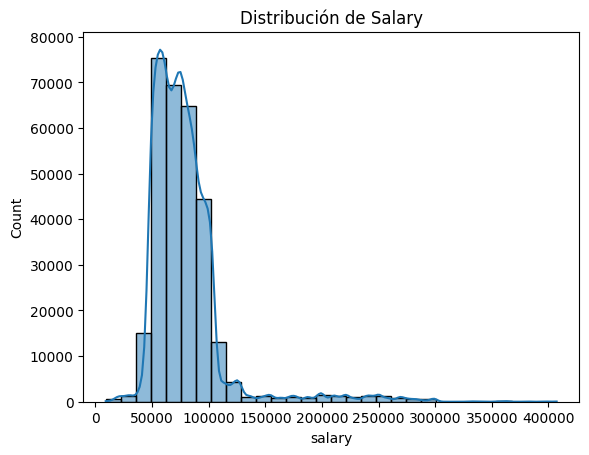

In [257]:
sns.histplot(df['salary'], bins=30, kde=True)
plt.title('Distribución de Salary')

In [258]:
# Por la distribucion asimétrica, se podría imputar por la mediana
# Creo una nueva variable con la columna salary imputada por la mediana
salary_median = df['salary'].fillna(df['salary'].median())

# muestro ambas columnas , no quiero pisar la original , quiero que este la original y la nueva con la imputacion
df['salary_median'] = salary_median
df[['salary', 'salary_median']].head()


,salary,salary_median
0,92552.0,92552.0
1,NaN,73479.0
2,NaN,73479.0
3,63253.0,63253.0
4,91163.0,91163.0


In [259]:
df['salary_median'].isnull().sum()

np.int64(0)

In [260]:
# con simple imputer
imputer = SimpleImputer(strategy='median')
df['salary_simple_imputer'] = imputer.fit_transform(df[['salary']])
df[['salary', 'salary_simple_imputer']].head()

,salary,salary_simple_imputer
0,92552.0,92552.0
1,NaN,73479.0
2,NaN,73479.0
3,63253.0,63253.0
4,91163.0,91163.0


In [261]:
df.columns

Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'total_flights', 'distance',
       'points_accumulated', 'points_redeemed', 'dollar_cost_points_redeemed',
       'country', 'province', 'city', 'postal_code', 'gender', 'education',
       'salary', 'marital_status', 'loyalty_card', 'clv', 'enrollment_type',
       'enrollment_year', 'enrollment_month', 'salary_median',
       'salary_simple_imputer'],
      dtype='object')

In [262]:
# con Iterative Imputer con RFR

# 1. Decidir qué variables usar
# 1. Supongamos que df tiene salary + 3 columnas categóricas que quiero usar como predictoras 
#    ['salary', 'gender', 'education', 'marital_status']
from sklearn.ensemble import RandomForestRegressor


df_RF = df[['salary', 'gender', 'education', 'marital_status']]

# 2. Convertir variables categóricas en dummies (asi las puede usar RFR)
df_encoded = pd.get_dummies(
    df_RF, 
    columns=['gender', 'education', 'marital_status'], 
    drop_first=True   # opcional, evita colinealidad
)

# 3. Definir el imputador (con RandomForest para mejorar imputaciones no lineales)
imputer_iter = IterativeImputer(
    estimator=RandomForestRegressor(n_estimators=50, random_state=42),
    max_iter=10,
    random_state=42
)

# 4. Ajustar e imputar sobre el DataFrame con dummies
df_imputed_array = imputer_iter.fit_transform(df_encoded)

# 5. Volver a DataFrame con los mismos nombres de columnas
df_imputed = pd.DataFrame(df_imputed_array, columns=df_encoded.columns)

In [263]:
# mostrasr las primeras filas
df_imputed.head()

,salary,gender_Male,education_College,education_Doctor,education_High School or Below,education_Master,marital_status_Married,marital_status_Single
0,92552.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,71851.124979,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,72504.429982,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,63253.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,91163.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [264]:
# Extraer la columna imputada de salary y añadirla al df original
df['salary_iterative_imputer'] = df_imputed['salary']

# Comparar las diferentes imputaciones
df[['salary','salary_median', 'salary_simple_imputer', 'salary_iterative_imputer']].head()

,salary,salary_median,salary_simple_imputer,salary_iterative_imputer
0,92552.0,92552.0,92552.0,92552.000000
1,NaN,73479.0,73479.0,71851.124979
2,NaN,73479.0,73479.0,72504.429982
3,63253.0,63253.0,63253.0,63253.000000
4,91163.0,91163.0,91163.0,91163.000000


In [265]:
df.loc[df['salary'].isna(), ['salary', 'salary_median', 'salary_simple_imputer', 'salary_iterative_imputer']]


,salary,salary_median,salary_simple_imputer,salary_iterative_imputer
1,NaN,73479.0,73479.0,71851.124979
2,NaN,73479.0,73479.0,72504.429982
17,NaN,73479.0,73479.0,72057.219735
20,NaN,73479.0,73479.0,72590.814921
21,NaN,73479.0,73479.0,72057.219735
...,...,...,...,...
403747,NaN,73479.0,73479.0,72590.814921
403749,NaN,73479.0,73479.0,72590.814921
403752,NaN,73479.0,73479.0,72057.219735
403755,NaN,73479.0,73479.0,72590.814921


In [266]:
df[['salary','salary_median', 'salary_simple_imputer', 'salary_iterative_imputer']].describe().T

,count,mean,std,min,25%,50%,75%,max
salary,301500.0,79371.732902,34726.433958,9081.0,59262.0,73479.000000,88606.0,407228.0
salary_median,403760.0,77879.284748,30117.567539,9081.0,63901.0,73479.000000,82940.0,407228.0
salary_simple_imputer,403760.0,77879.284748,30117.567539,9081.0,63901.0,73479.000000,82940.0,407228.0
salary_iterative_imputer,403760.0,77574.195716,30167.363432,9081.0,63901.0,72057.219735,82940.0,407228.0


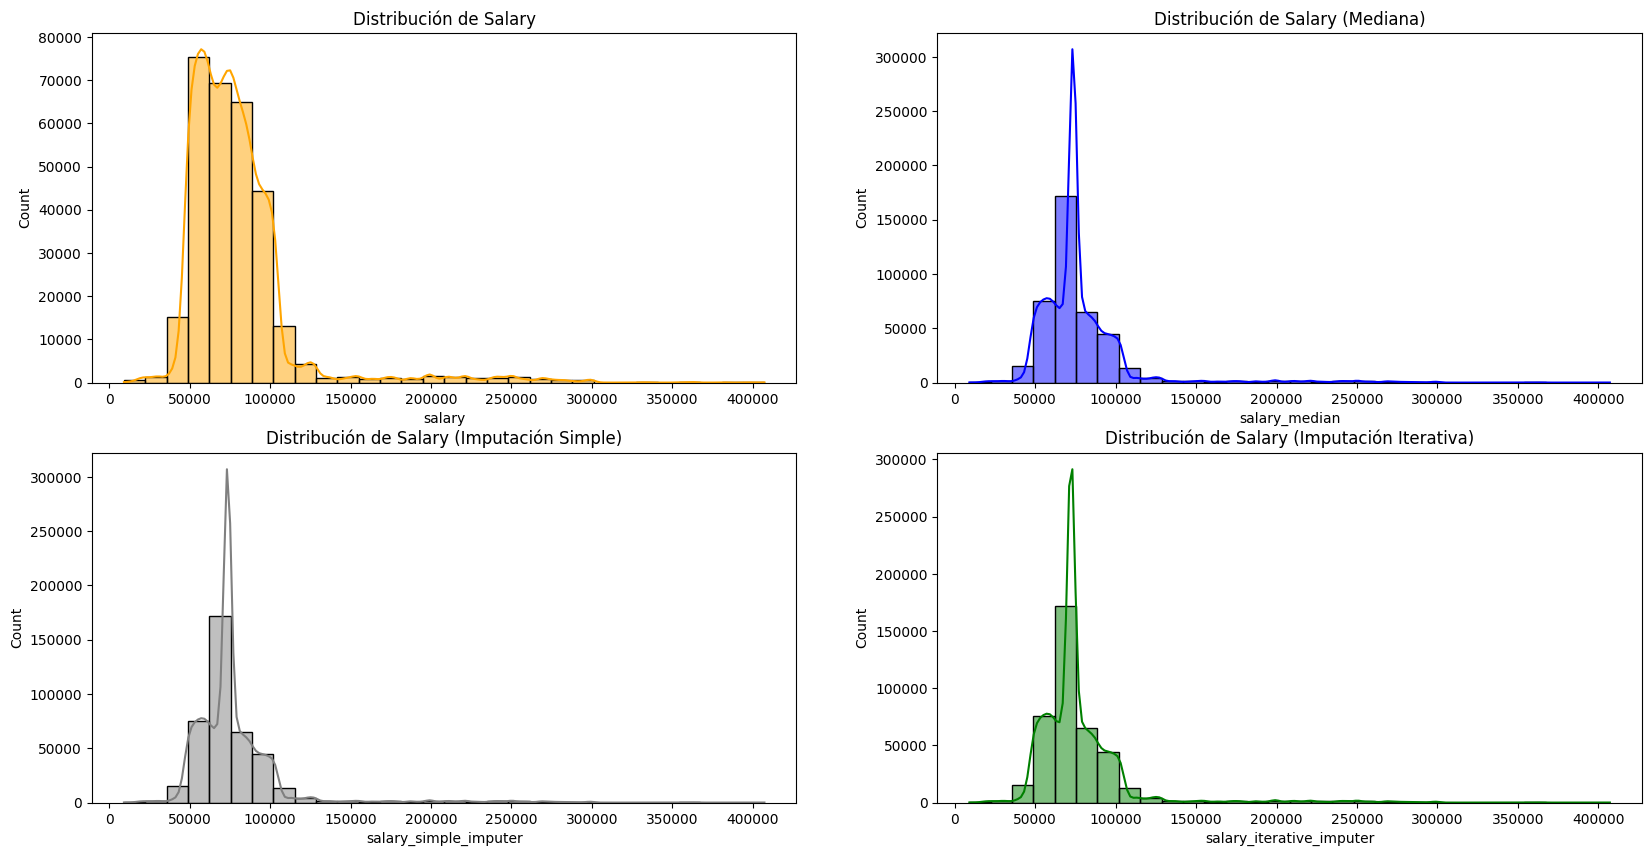

In [267]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(df['salary'], bins=30, kde=True, color='orange', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Salary')
sns.histplot(df['salary_median'], bins=30, kde=True, color='blue', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Salary (Mediana)')
sns.histplot(df['salary_simple_imputer'], bins=30, kde=True, color='grey', ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Salary (Imputación Simple)')
sns.histplot(df['salary_iterative_imputer'], bins=30, color='green', kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Salary (Imputación Iterativa)');

In [268]:
# me decido por la imputación iterativa, creo que aunque el modelo es básico, puede captar mejor las relaciones entre variables y
# reflejar mejor la distribución original de los datos.
# Además, imputar un 25% de datos es mucho, y la mediana o la imputación simple (mediana igualmente) pueden sesgar demasiado los resultados.

#decido incluir esta en el df final y eliminar las otras imputaciones y la variable original salary


# Guardar la posición original de salary
pos_salary = df.columns.get_loc("salary")

# Eliminar las columnas no deseadas
df_final = df.drop(columns=['salary', 'salary_median', 'salary_simple_imputer'])

# Renombrar columna imputada
df_final = df_final.rename(columns={'salary_iterative_imputer': 'salary'})

# Reordenar columnas: insertar salary en la posición original
cols = df_final.columns.tolist()
cols.insert(pos_salary, cols.pop(cols.index('salary')))
df_final = df_final[cols]

df_final.head()


,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,71851.124979,Single,Nova,2887.74,Standard,2013,3
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,72504.429982,Divorced,Nova,2838.07,Standard,2016,7
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1


## Visualizaciones

 ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
 ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
 ¿Cuál es la distribución de los clientes por provincia o estado?
 ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
 ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
 ¿Cómo se distribuyen los clientes según su estado civil y género?
